### <font color='peru'>**MAXIMIZING REVENUE FOR TAXI CAB DRIVERS THROUGH PAYMENT TYPE ANALYSIS**</font>

##### <font color='papayawhip'>**PROBLEM STATEMENT**</font>

<p align='justify'>In today's competitive world of taxi services, maximizing revenue is crucial for both long-term success and driver satisfaction. To achieve this, it is important to understand how different payment methods affect fare pricing. This research focuses on finding out whether the way customers pay (either with credit cards or cash), affects the amount they are charged.</p>

##### <font color='papayawhip'>**OBJECTIVE**</font>

<p align='justify'>The main goal of this project is to analyze the impact of payment methods on taxi fares. The use of statistical techniques and Python is useful to compare fares between customers who pay with credit cards and those who use cash. By doing this, it is aimed to discover whether there is a significant difference in fares based on the payment method. This information will help taxi drivers potentially increase their earnings by understanding payment preferences.</p>

##### <font color='papayawhip'>**RESEARCH QUESTION**</font>

<p align='justify'>Is there a significant difference in taxi fares based on the payment method used, and can this information be used to encourage payment methods that lead to higher revenue for drivers, while maintaining a positive experience for customers?</p>

### <font color='sandybrown'>**IMPORTING LIBRARIES**</font>
- **Pandas** for handling structured data in DataFrame (tabular) format.
- **Numpy** for numerical operations.
- **Matplotlib** for plotting visualizations to analyze the data trends and distributions visually.
- **Seaborn** for barplots and histograms.
- **scipy.stats** contains probability distributions and is used here to perform hypothesis testing, probability calculations, and other statistical analyses required for the A/B testing in this project.
- **warnings** module manages and controls warning messages that caution about the potential issues in the code but do not stop the program from running.
- **warnings.filterwarnings("ignore")** supresses all warning messages in the notebook for a clean and focused analysis.
- **train_test_split**: Splits the dataset into training and testing sets for model evaluation.
- **cross_val_score**: Performs cross-validation to assess the model's performance on different subsets of the data.
- **LinearRegression**: Fits a linear model to predict the target variable based on the features.
- **mean_squared_error**: Measures the average squared difference between predicted and actual values to evaluate model accuracy.
- **r2_score**: Indicates the proportion of variance in the target variable explained by the model, showing its goodness of fit.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### <font color='sandybrown'>**LOADING THE DATASET**</font>

In [ ]:
# Reading the dataset
taxi_data = pd.read_csv("/content/drive/MyDrive/Datasets/yellow_tripdata_2020-01.csv")

In [ ]:
# Printing the first five values of all the features in the dataset
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [ ]:
# Printing the last five values of all the features in the dataset
taxi_data.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.0,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.0,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.0,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.0,0.00,0.3,30.22,0.0
6405007,NaN,2020-01-31 22:44:00,2020-01-31 23:06:00,NaN,11.60,NaN,NaN,179,205,NaN,54.56,2.75,0.5,0.0,0.00,0.3,58.11,0.0


### <font color='sandybrown'>**EXPLORATORY DATA ANALYSIS**</font>

##### <font color='papayawhip'>**DATASET DESCRIPTION**

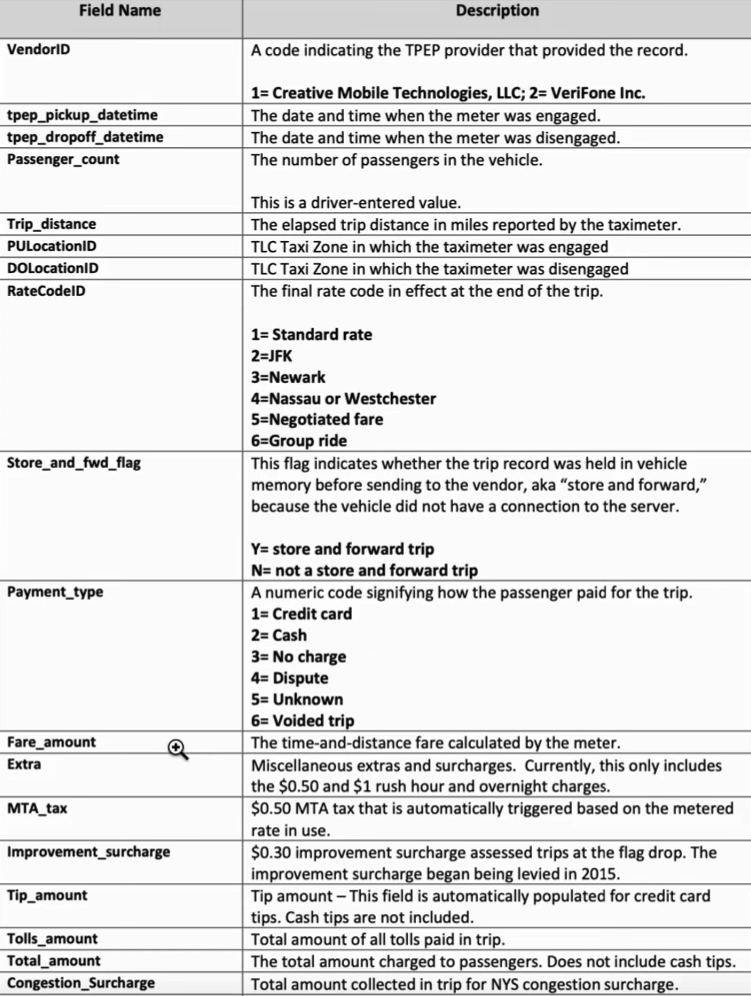


In [ ]:
# Checking the size of the dataset
# shape returns the number of rows and columns of the dataset
taxi_data.shape

(6405008, 18)

In [ ]:
# Checking the datatypes of the features present in the dataset
print(taxi_data.dtypes)

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object


- <p align='justify'>The first step in data analysis should always be to identify the features in the dataset that can be used to calculate and analyze the target variable more effectively.</p>
- <p align='justify'>Here, it is being attempted to analyze the effects on revenue. In general, the cab fares are dependent on several factors like the duration of travel, route used to reach the destination, etc.</p>
- <p align='justify'>Hence, it becomes necessary to identify those factors in the dataset which affect the revenue of the taxi drivers. These factors could be directly identified or can be obtained through certain calculations.</p>
- <p align='justify'>For example, the duration of travel is calculated below with the help of pickup and dropoff time. This time can be used for further analysis using regression analysis, time-series analysis, etc.</p>
- <p align='justify'>The travel duration is a crucial factor in determining fare amounts, as longer trips typically lead to higher charges. By calculating trip duration, it can be later analyzed how duration influences fare amounts. This analysis can be further used in regression analysis.</p>

In [ ]:
# Calculating the duration from the pickup and dropoff datetime

# Converting the pickup and dropoff time datatypes to datetime objects as they are present in some other format
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'])

# Creating a feature called duration and using it to store the duration time
# by subtracting dropoff time and pickup time
taxi_data['duration'] = taxi_data['tpep_dropoff_datetime'] - taxi_data['tpep_pickup_datetime']

In [ ]:
print(taxi_data.dtypes)

VendorID                         float64
tpep_pickup_datetime      datetime64[ns]
tpep_dropoff_datetime     datetime64[ns]
passenger_count                  float64
trip_distance                    float64
RatecodeID                       float64
store_and_fwd_flag                object
PULocationID                       int64
DOLocationID                       int64
payment_type                     float64
fare_amount                      float64
extra                            float64
mta_tax                          float64
tip_amount                       float64
tolls_amount                     float64
improvement_surcharge            float64
total_amount                     float64
congestion_surcharge             float64
duration                 timedelta64[ns]
dtype: object


In [ ]:
# Printing the first five values in the dataset to check how it looks now
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,0 days 00:04:48
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,0 days 00:07:25
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,0 days 00:06:11
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,0 days 00:04:51
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,0 days 00:02:18


***NOTE:***
- <p align='justify'>The newly created feature 'duration' is in timedelta format.</p>
- <p align='justify'>This feature displays time in the HH:MM:SS format. It is very difficult to analyze the exact duration from such a format. Hence, it is necessary to convert this entire time into minutes. Other time formats like hours and seconds can also be used here, but the entire time duration being converted to minutes makes it more comprehensible and easy to understand.</p>
- <p align='justify'>In order to do so, it is first required to compute the total seconds and then convert the seconds to minutes.</p>

In [ ]:
# Converting time in the HH:MM:SS format to minutes
taxi_data['duration'] = taxi_data['duration'].dt.total_seconds() / 60

In [ ]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000


In [ ]:
taxi_data.dtypes

,0
VendorID,float64
tpep_pickup_datetime,datetime64[ns]
tpep_dropoff_datetime,datetime64[ns]
passenger_count,float64
trip_distance,float64
RatecodeID,float64
store_and_fwd_flag,object
PULocationID,int64
DOLocationID,int64
payment_type,float64


### <font color='sandybrown'>**DATA CLEANING**</font>

<p align='justify'>The quality of insights and predictions heavily depends on the quality of the data. The raw dataset may contain errors, inconsistencies, or irrelevant information that can lead to inaccurate and misleading results. Without data cleaning, any conclusions or models based on the dataset may become unreliable.</p>

It involves the following:
1. Dropping Unncessary Columns
2. Handling Missing Values
3. Correcting Data Types
4. Dealing with Duplicates
5. Outlier Removal


#### <font color='papayawhip'>**DROPPING UNNECESSARY COLUMNS**</font>
- <p align='justify'>There are many columns in the dataset, but as per the problem statement, only few fields are required. Rest columns would serve no purpose to the study.</p>
- <p align='justify'>Therefore, the further process would involve extracting the necessary features from the dataset, and then later, dropping the unnecessary columns.</p>
- <p align='justify'>As the problem statement is revolving around payment type, fare amount, and other factors influencing the fare amount, filtering the data is necessary to have only passenger_count, payment_type, trip_distance, fare_amount, and duration as the features in the dataset.</p>

In [ ]:
# Extracting the required features from the dataset and storing them in the same dataset
taxi_data = taxi_data[['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'duration']]


# alternate option is to drop the unwanted columns directly from the dataset
#taxi_data.drop(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
#                'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
#                'DOLocationID', 'extra', 'mta_tax', 'tip_amount',
#                'tolls_amount', 'improvement_surcharge', 'congestion_surcharge',
#                'total_amount'], axis = 1, inplace = True)

In [ ]:
# checking the filtered data with relevant columns essential for the analysis
# by printing the first 5 values in the dataset
taxi_data.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.2,4.800000
1,1.0,1.0,7.0,1.2,7.416667
2,1.0,1.0,6.0,0.6,6.183333
3,1.0,1.0,5.5,0.8,4.850000
4,1.0,2.0,3.5,0.0,2.300000


#### <font color='papayawhip'>**HANDLING MISSING VALUES**</font>
- <p align='justify'>The first step involves finding out the number of null values in the dataset.</p>
- <p align='justify'>Using the number of null values, their percentage in the dataset can be calculated.</p>
- <p align='justify'>If this percentage is not that significant, then those null values can be dropped from the dataset.</p>
- If the percentage is very high, then replacing those values with some other value like mean, median, mode, etc. is a solution.</p>

In [ ]:
# Finding the number of values that have null values in it
taxi_data.isnull().sum()

,0
passenger_count,65441
payment_type,65441
fare_amount,0
trip_distance,0
duration,0


In [ ]:
# Finding out the percentage of null values
print(f"Missing data comprises of {65441/len(taxi_data)*100}% of the data.")

Missing data comprises of 1.021716132126611% of the data.


In [ ]:
# since the percentage of null values is not that significant
# percentage = 1.0217%
# Hence, drop those values
taxi_data.dropna(inplace=True)

In [ ]:
# Printing the data to check the number of rows
# After handling the missing values
taxi_data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


#### <font color='papayawhip'>**CORRECTING DATA TYPES**</font>
- <p align='justify'>The columns 'passenger_count' and 'payment_type' are originally in float format.</p>
- <p align='justify'>They cannot be float as they represent discrete values and should be integers because 1.5 passengers does not exist in reality.</p>
- <p align='justify'>Hence, converting these columns to correct data types (from float to int) improves accuracy.</p>

In [ ]:
# Changing the data types from float to int
taxi_data['passenger_count'] = taxi_data['passenger_count'].astype('int64')
taxi_data['payment_type'] = taxi_data['payment_type'].astype('int64')

#### <font color='papayawhip'>**DEALING WITH DUPLICATES**</font>
- <p align='justify'>Duplicate rows are always problematic in the analysis. They can skew the analysis by over-representing certain data points, leading to biased results. For example, identical trips recorded more than once can distort fare averages and payment method preferences.</p>
- <p align='justify'>Why is this happening? This is happening because in the original dataset where there were 18 features earlier, each data point considerably represented distinct values due to different combinations. But when certain features were selected, these combinations started to repeat.</p>
- <p align='justify'>Removing duplicate values ensures the analysis remains unbiased and does not give misleading insights. Hence, drop these values.</p>

In [ ]:
# Checking for duplicate values
taxi_data[taxi_data.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [ ]:
# Dropping the duplicate values
taxi_data.drop_duplicates(inplace = True)

In [ ]:
# After removing the missing values and duplicate rows, we are now left with
# these many records
taxi_data.shape

(3007861, 5)

### <font color='sandybrown'>**DISTRIBUTION OF PASSENGER COUNT AND PAYMENT TYPE IN ANALYSIS**</font>
- <p align='justify'>After cleaning the data, it is always necessary to understand how different categories are distributed within the dataset.</p>
- Why this analysis? This helps in identifying patterns and making sense of the relationships between the different variables and features.</p>
- <p align='justify'>The columns 'passenger_count' and 'payment_type' are categorical variables. They represent distinct categories, with passenger_count indicating the number of passengers and payment_type representing how the fare was paid (e.g., 1 for credit card, 2 for cash etc.).</p>
- <p align='justify'>The distributions would allow to answer questions like:</p>

  - What is the most common passenger count in a taxi?
  - Which payment method is used more frequently?

#### <font color='papayawhip'>**ANALYSIS OF PASSENGER COUNT DISTRIBUTION**</font>

In [ ]:
# Value_counts gives you the frequency of the category
# normalize parameter when passed to value_count return the % of the contribution
taxi_data['passenger_count'].value_counts(normalize = True)

,proportion
passenger_count,
1,0.581981
2,0.190350
3,0.066360
5,0.062937
6,0.039272
4,0.036046
0,0.023033
7,0.000009
9,0.000006


#### <font color='papayawhip'>**INTERPRETATION OF THE PASSENGER COUNT DISTRIBUTION**</font>

<p align='justify'>
The output above indicates that:</p>

  - 58% of the rides have 1 passenger.
  - 19% have 2 passengers.
  - The percentages for 3 to 5 passengers progressively decrease.
  - Counts for 7, 8, or 9 passengers are negligible, contribute very less to the payment, and can be considered as outliers. In reality also, the probability of expecting 7, 8, or 9 passengers count is very low.

<p align='justify'>This means that most rides are single-passenger trips, which implies that optimizing services around single passengers could lead to efficiency gains for taxi drivers. Larger groups (3 to 5 passengers) are less common but might require different pricing models.</p>

#### <font color='papayawhip'>**ANALYSIS OF PAYMENT TYPE DISTRIBUTION**</font>

In [ ]:
# Repeat the same with the payment_type feature
# payment type distribution
taxi_data['payment_type'].value_counts(normalize = True)

,proportion
payment_type,
1,6.782670e-01
2,3.075731e-01
3,8.721480e-03
4,5.438084e-03
5,3.324622e-07


#### <font color='papayawhip'>**INTERPRETATION OF THE RESULTS FOR PAYMENT_TYPE DISTRIBUTION**</font>
<p align='justify'>Similar is the case with payment_type. The results above show that:</p>

- 67.8% of trips are paid using the payment type 1.
- 30.7% of trips are paid using the payment type 2.
- Payment types 3, 4, and 5 are almost negligible and do not significantly impact the analysis.

#### <font color='papayawhip'>**INSIGHTS FROM BOTH THE DISTRIBUTIONS**</font>
<p align='justify'>Focusing solely on the payment types 'card' and 'cash' denoted by 1 and 2 in the dataset could be of better help as they comprise a larger proportion comparatively. To ensure that the analysis centers on these payment methods, it is necessary to filter the data accordingly, and therefore, excluding all other types.</p>

<p align='justify'>Moreover, examining the distribution of passenger count reveals that trips with more than 5 passengers are rare. Additionally, trips with 0 passengers are impossible, as at least one passenger's presence is expected for a successful payment of the fare amount. Therefore, filtering the passenger count to include only values ranging from 1 to 5 (both inclusive) can help target marketing or pricing strategies.</p>

#### <font color='papayawhip'>**Removing the values that we do not require through selection after interpreting the results from distribution**</font>

In [ ]:
# filtering for passenger count from 1 to 5 (both inclusive)
taxi_data = taxi_data[(taxi_data['passenger_count']>0)&(taxi_data['passenger_count']<6)]

# filtering for payment type 1 and 2
taxi_data = taxi_data[taxi_data['payment_type'] < 3]

In [ ]:
# checking for the size of the dataset after filtering
taxi_data.shape

(2780283, 5)

In [ ]:
# Replacing the payment type's encoded values - 1 and 2 with 'Card' and 'Cash' respectively
taxi_data['payment_type'].replace([1,2],['Card','Cash'], inplace=True)

In [ ]:
# checking for the changes
taxi_data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
4,1,Cash,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000
6339564,1,Card,12.5,2.55,16.283333


#### <font color='papayawhip'>**DESCRIPTIVE STATISTICS OF THE DATA**</font>
<p align='justify'>Descriptive statistics provides a summary of the central tendency, dispersion, and shape of the distribution of each feature. </p>

In [ ]:
# descriptive statistics of the data
taxi_data.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


#### <font color='papayawhip'>**INTERPRETATION OF DESCRIPTIVE STATISTICS OF THE DATA**</font>
- <p align = 'justify'>4 numerical features namely 'passenger_count', 'fare_amount', 'trip_distance', and 'duration' are displayed. The 5th feature 'payment_type' is not displayed in descriptive statistics because it is a categorical data.</p>
- <p align = 'justify'>The minimum value of fare_amount, trip_distance, and duration is negative which is not possible. It means that there are wrong and unrealistic values in the dataset and these values have to be removed as they cannot be used for further analysis. Only those values which are greater than zero need to be considered.</p>
- <p align = 'justify'>Negative values in these columns are likely a result of errors during data collection. The presence of extreme values in the dataset, such as negative fare amounts, trip distances, and excessively long durations, highlights the need for further data cleaning.</p><br>

**INTERPRETATION OF OUTLIERS**:

- <p align = 'justify'>Looking at the 25th, 50th, 75th, and 100th (max) percentile, it can be said that there is a possibility of outliers (particularly high values) in the dataset. There is a gradual difference in the 25th, 50th, and 75th percentile. But a drastic increase in the values is seen present in the max row, which indicates the presence of many outliers in the higher end.</p>
- <p align = 'justify'>Precisely, in the 'duration' column, the wide range of durations, with a maximum of over 8500 minutes (almost 6 days), indicates that some trips have incorrect or anomalous data. Such values are clear outliers and must be excluded from further analysis.</p>
- <p align = 'justify'>The presence of extreme values in the dataset, such as negative fare amounts, trip distances, and excessively long durations, highlights the need for further data cleaning.</p>

In [ ]:
# Filtering the records for only positive values
taxi_data = taxi_data[taxi_data['fare_amount']>0]
taxi_data = taxi_data[taxi_data['trip_distance']>0]
taxi_data = taxi_data[taxi_data['duration']>0]

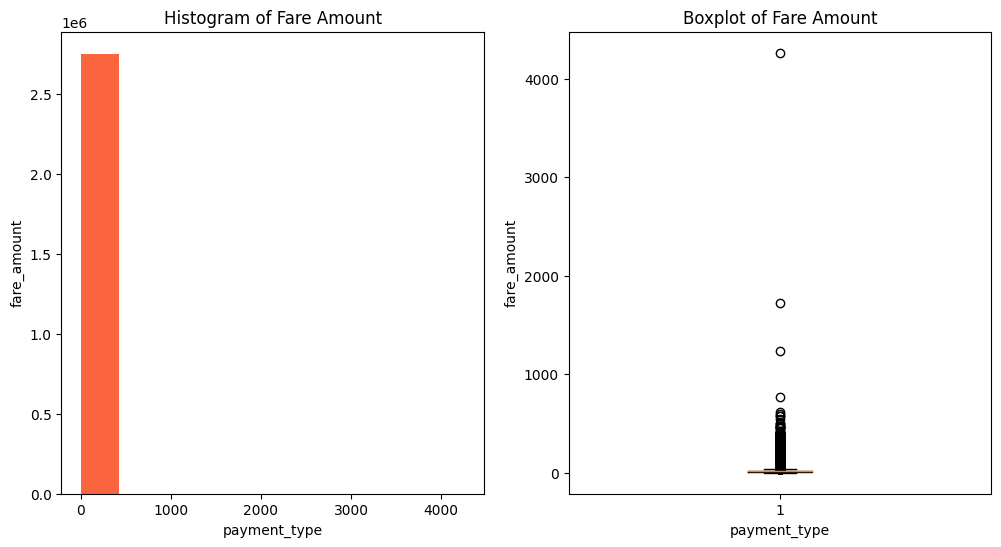

In [ ]:
# Checking for outliers in fare_amount
plt.figure(figsize=(12,6))

# Plotting a histogram
plt.subplot(1,2,1)
plt.hist(taxi_data['fare_amount'], color='#FA643F')
plt.title("Histogram of Fare Amount")
plt.xlabel("payment_type")
plt.ylabel("fare_amount")

# Plotting a Boxplot
plt.subplot(1,2,2)
plt.boxplot(taxi_data['fare_amount'])
plt.title("Boxplot of Fare Amount")
plt.xlabel("payment_type")
plt.ylabel("fare_amount")

plt.show()

#### <font color='papayawhip'>**INTERPRETATION OF HISTOGRAM & BOXPLOT**</font>

<p align='justify'>By visualizing the distribution of fare amounts, it is targeted to identify trends and spot any anomalies or outliers. The boxplot, in particular, helps detect outliers.</p>


- <p align='justify'>There are a lot of outliers in the data spanning up to the value of 4000.</p>
- <p align='justify'>It means that a passenger has booked a cab to travel intercity distance (which is very rare as per the data).</p>
- <p align='justify'>Outliers can be removed using IQR or Z-score. Here, Inter-Quartile Range (IQR) will be used because the data does not seem normally distributed.</p>

In [ ]:
# Removing outliers using interquartile range for the numerical variables

# iterating over the columns
for col in ['fare_amount', 'trip_distance', 'duration']:
  Q1 = taxi_data[col].quantile(0.25) # first quartile
  Q3 = taxi_data[col].quantile(0.75) # third quartile
  IQR = Q3 - Q1 # interquartile range

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # filtering out the outliers
  taxi_data = taxi_data[(taxi_data[col] >= lower_bound) & (taxi_data[col] <= upper_bound)]

In [ ]:
# Reviewing the data after making relevant changes
taxi_data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


### <font color='sandybrown'>**ANALYZING THE RELATIONSHIP BETWEEN PAYMENT TYPE, TRIP DISTANCE, AND FARE AMOUNT**</font>

- <p align = 'justify'>To better understand how the passenger behavior, specifically regarding trip distance and fare amount, varies based on the payment method, there is a need to explore the distribution of payment types (Card vs. Cash).</p>
- <p align = 'justify'>The goal is to identify any significant variations in fare amounts or trip distances associated with different payment methods.</p>
- <p align = 'justify'>To investigate this, the approach used here involes stacked histograms to visualize the distribution of </p>

    - Fare Amounts for passengers paying with Card vs Cash.
    - Trip Distances for passengers using Card vs Cash.

- <p align = 'justify'>By comparing these distributions, we can:</p>

    - Identify which payment type is associated with higher or lower fare amounts.
    - Determine if there are significant differences in trip distances between card and cash payments.

- <p align='justify'>This visualization will help stakeholders understand fare amount ranges and typical trip distances for each payment type. Further, summarizing the mean and standard deviation of both fare amount and trip distance for each payment type will provide a more quantitative comparison between card and cash payments.</p>

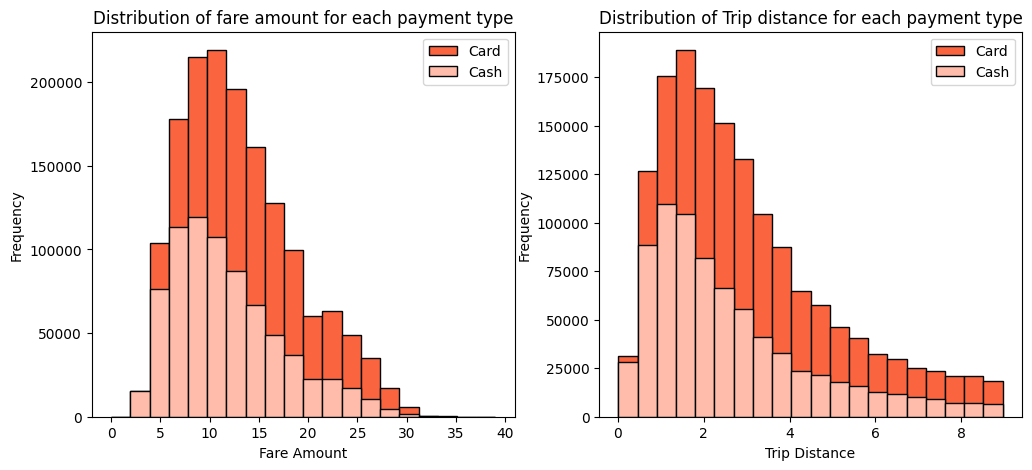

In [ ]:
# Plotting stacked histogram
plt.figure(figsize=(12,5))

# Stacked histogram of fare amount for each payment type
plt.subplot(1,2,1)
plt.hist(taxi_data[taxi_data['payment_type']=='Card']['fare_amount'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color ='#FA643F', label = 'Card')
plt.hist(taxi_data[taxi_data['payment_type']=='Cash']['fare_amount'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color ='#FFBCAB', label = 'Cash')
plt.legend(['Card', 'Cash'])
plt.title("Distribution of fare amount for each payment type")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

# Stacked histogram of trip distance for each payment type
plt.subplot(1,2,2)
plt.hist(taxi_data[taxi_data['payment_type']=='Card']['trip_distance'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color ='#FA643F', label = 'Card')
plt.hist(taxi_data[taxi_data['payment_type']=='Cash']['trip_distance'], histtype = 'barstacked', bins = 20, edgecolor = 'k', color ='#FFBCAB', label = 'Cash')
plt.legend(['Card', 'Cash'])
plt.title("Distribution of Trip distance for each payment type")
plt.xlabel("Trip Distance")
plt.ylabel("Frequency")

plt.show()

In [ ]:
# calculating the mean and standard deviation using group by on payment type
taxi_data.groupby('payment_type').agg({'fare_amount':['mean','std'], 'trip_distance':['mean','std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

#### <font color='papayawhip'>**PREFERENCE OF PAYMENT TYPE**</font>

<p align='justify'>To analyze passengers' preferences for payment methods, the proportion of the two payment types will have to be assessed. A pie chart is an ideal choice for this visualization as it provides a clear and intuitive representation of the relative distribution between the two payment methods.</p>

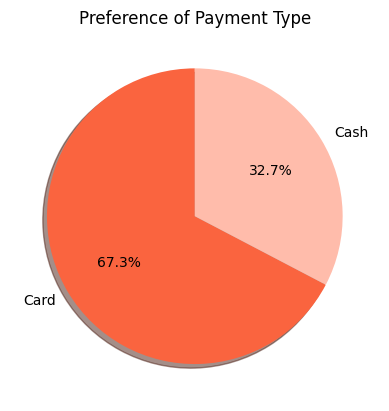

In [ ]:
plt.title('Preference of Payment Type')
plt.pie(taxi_data['payment_type'].value_counts(normalize=True), labels = taxi_data['payment_type'].value_counts().index,
        startangle = 90, shadow = True, autopct = '%1.1f%%', colors = ['#FA643F', '#FFBCAB'])
plt.show()

#### <font color='papayawhip'>**PASSENGER COUNT ANALYSIS**</font>

- <p align='justify'>The objective is to explore how payment preferences vary with the number of passengers traveling in the cab. To achieve this, a stacked bar plot is used, which is an effective visualization technique for comparing the percentage distribution of payment methods across different passenger counts.</p>

- <p align='justify'>This plot will help to understand whether the payment method chosen changes based on the number of passengers, providing insights into how payment preferences shift with varying passenger numbers.</p>

In [ ]:
# calculating the total passenger count distribution based on the different payment type
passenger_count = taxi_data.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

# renaming passenger_count to count to reset the index
passenger_count.rename(columns={'passenger_count':'count'}, inplace=True)
passenger_count.reset_index(inplace=True)

# calculating the percentage of the each passenger count
passenger_count['perc'] = (passenger_count['count'] / passenger_count['count'].sum() )* 100

# creating a new empty dataframe to store the distribution of each payment type (useful for visualization)
df = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df['payment_type'] = ['Card', 'Cash']
df.iloc[0,1:] = passenger_count.iloc[:5,-1]
df.iloc[1,1:] = passenger_count.iloc[5:, -1]

df

,payment_type,1,2,3,4,5
0,Card,39.568381,14.2591,5.327106,2.771042,5.398171
1,Cash,20.042143,6.765806,2.371984,1.423686,2.072581


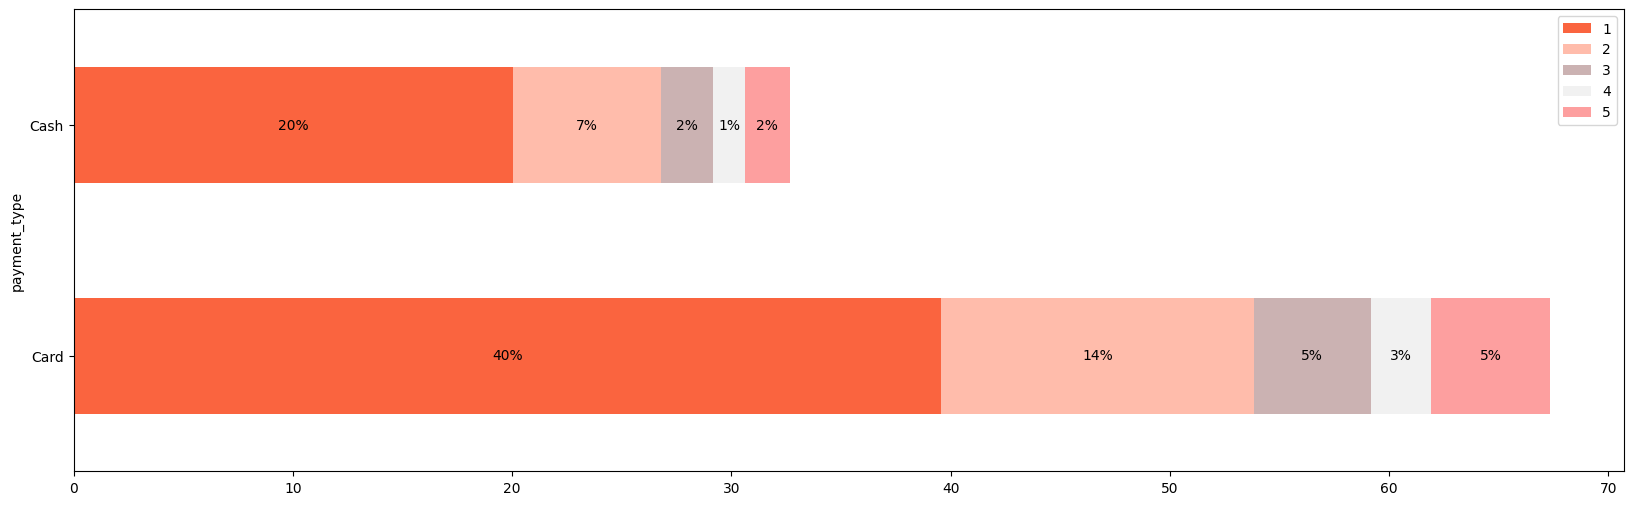

In [ ]:
# Plotting the stacked bar plot
fig, ax = plt.subplots(figsize=(20, 6))
df.plot(x='payment_type', kind='barh', stacked=True, color=['#FA643F','#FFBCAB','#CBB2B2','#F1F1F1','#FD9F9F'], ax=ax)

# Add percentage text
for p in ax.patches:
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  ax.text(x + width / 2,
          y + height / 2,
          '{:.0f}%'.format(width),
          horizontalalignment='center',
          verticalalignment='center',
          fontsize = 10, color='black' if width > 0 else 'white')

### <font color='sandybrown'>**UNDERSTANDING THE RELATIONSHIP BETWEEN DURATION AND FARE AMOUNT**

- <p align='justify'>While feature selection, the trip duration was calculated by subtracting the pickup time from the dropoff time. The resultant values were stored in another feature named 'duration'.</p>
- <p align='justify'>Previously, the impact of payment_type and passenger_count on fare amounts was analyzed. Now, the relationship between trip duration and fare amount will be explored below.</p>
- The goal of this section is to assess the correlation between trip_duration and fare_amount using linear regression analysis, determining whether longer trip durations result in significantly higher fares.

In [ ]:
# Checking for linearity using Correlation Coefficient (Pearson’s r)
correlation = taxi_data['duration'].corr(taxi_data['fare_amount'])
print("Pearson Correlation Coefficient:", correlation)


Pearson Correlation Coefficient: 0.8718769669529877


- <p align='justify'>Both the duration and fare_amount are continuous values. Using the Correlation Coefficient (Pearson’s r), it can be seen that there is a strong linear correlation between these two variables.</p>
- <p align='justify'>Hence, linear regression would serve as a good starting point for understanding the relationship between these two variables due its simplicity, better interpretability, and relationship nature.</p>

In [ ]:
# Checking the duration column
taxi_data['duration']

,duration
0,4.800000
1,7.416667
2,6.183333
3,4.850000
5,0.883333
...,...
6339550,12.383333
6339555,14.800000
6339561,21.500000
6339563,19.000000


In [ ]:
# checking for missing values in duration field
taxi_data['duration'].isnull().sum()

0

In [ ]:
# Defining features (duration) and target (fare_amount)
x = taxi_data[['duration']]
y = taxi_data['fare_amount']

In [ ]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predict on the test set
y_pred = model.predict(x_test)
y_pred

array([14.55923261, 13.48640571, 20.22329722, ...,  8.74520295,
       20.48862   ,  6.31115482])

<p align='jutify'>The R-squared value analyzed below indicates how well the model fits the data, explaining the variance in fare amounts based on trip duration. Comparing it with cross-validation scores ensures that the model generalizes well across different subsets of the data.</p>

In [ ]:
# Evaluate the Model performance
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 8.121797690279323
R-squared: 0.7601103467039959


In [ ]:
# Cross-validation to ensure model generalization.
# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, x, y, cv=5, scoring='r2')

print("Cross-Validation R-squared Scores:", cv_scores)
print("Mean R-squared Score:", np.mean(cv_scores))
print("Standard Deviation of R-squared Scores:", np.std(cv_scores))

Cross-Validation R-squared Scores: [0.79672924 0.76646725 0.74968102 0.729292   0.718723  ]
Mean R-squared Score: 0.752178499350911
Standard Deviation of R-squared Scores: 0.02770645061179831


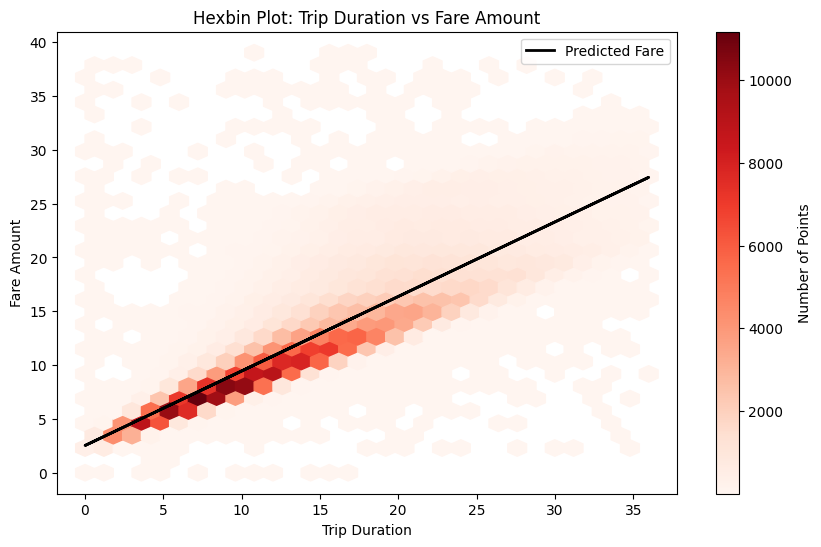

In [ ]:
# Visualize the relationship between Trip duration and Fare amount using Hexbin plot

plt.figure(figsize=(10, 6))
plt.hexbin(x_test['duration'], y_test, gridsize=30, cmap='Reds', mincnt=1)
plt.colorbar(label='Number of Points')

# Plot predicted fare
plt.plot(x_test, y_pred, color='black', linewidth=2, label='Predicted Fare')
plt.xlabel('Trip Duration')
plt.ylabel('Fare Amount')
plt.title('Hexbin Plot: Trip Duration vs Fare Amount')
plt.legend()
plt.show()

- <p align='justify'>Residual Plot below shows the relationship between trip duration (on the x-axis) and the residuals (on the y-axis). It detects any anomalies or deviations between the predicted fare and actual fare.</p>

- <p align='justify'>This helps to visually assess if the model performs poorly for certain trip durations, which may indicate areas where trip duration and fare amount don't correlate well.</p>

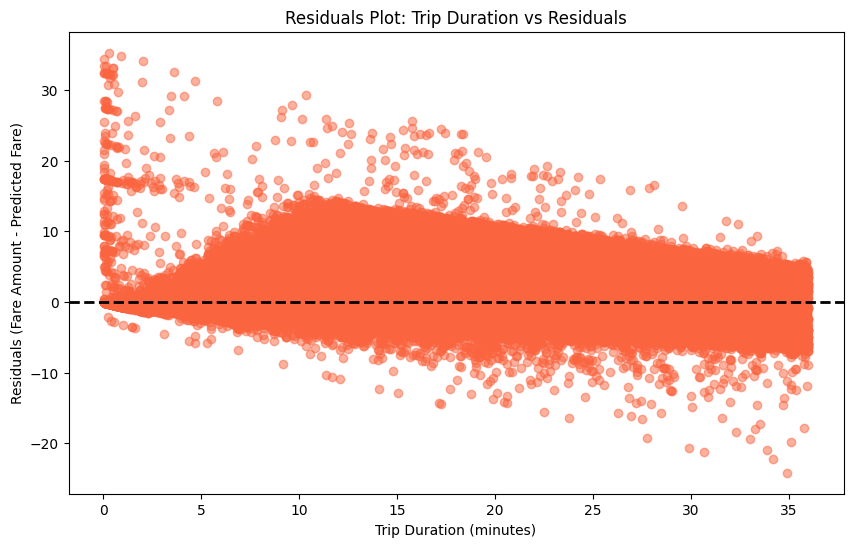

In [ ]:
# Residual Plot to Detect Deviations/Anomalies
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(x_test, residuals, color='#FA643F', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Residuals (Fare Amount - Predicted Fare)')
plt.title('Residuals Plot: Trip Duration vs Residuals')
plt.show()

- <p align='justify'>Fare Variability by duration range is analyzed by binning the duration feature into different ranges (e.g., 0-10 mins, 10-20 mins, etc.) to analyze how the fare amount varies for different trip lengths.</p>
- <p align='justify'>Calculating the mean, standard deviation, and variance for fare amounts across these ranges help to understand how fare variability is affected by trip duration.</p>
- <p align='justify'>This provides insights into fare variability and can help optimize pricing strategies for different trip durations.</p>

In [ ]:
# Exploring Variability of Fare Amount Based on Duration Ranges

# Create bins for trip durations
taxi_data['duration_bins'] = pd.cut(taxi_data['duration'], bins=[0, 10, 20, 30, 60, np.inf], labels=['0-10 mins', '10-20 mins', '20-30 mins', '30-60 mins', '>60 mins'])
fare_variability = taxi_data.groupby('duration_bins')['fare_amount'].agg(['mean', 'std', 'var'])
print("Fare Amount Variability Based on Duration Ranges:")
print(fare_variability)

Fare Amount Variability Based on Duration Ranges:
                    mean       std        var
duration_bins                                
0-10 mins       6.850395  2.207137   4.871453
10-20 mins     12.880682  3.702283  13.706903
20-30 mins     19.093317  3.936313  15.494563
30-60 mins     24.020010  3.560048  12.673939
>60 mins             NaN       NaN        NaN


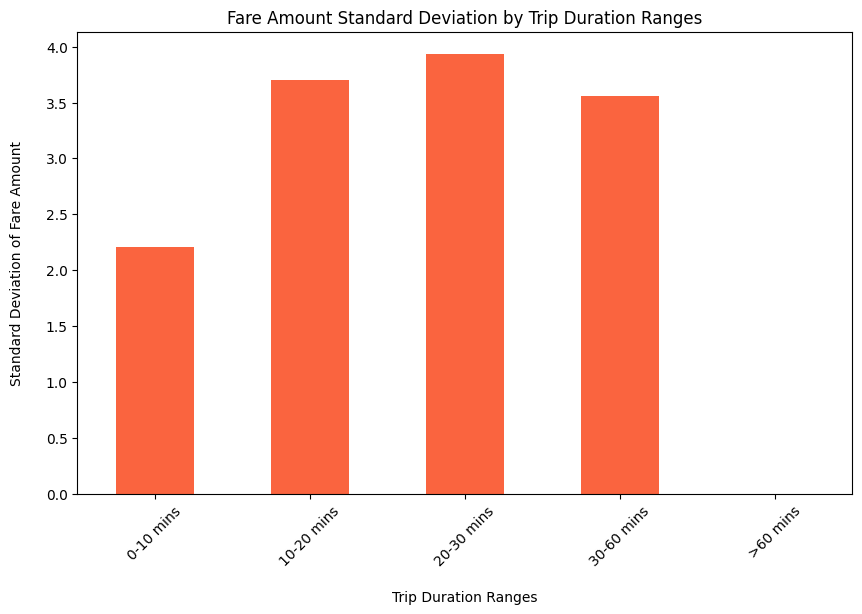

In [ ]:
# Plot the standard deviation of fare amounts for different duration ranges
plt.figure(figsize=(10, 6))
fare_variability['std'].plot(kind='bar', color='#FA643F', figsize=(10, 6))
plt.title('Fare Amount Standard Deviation by Trip Duration Ranges')
plt.ylabel('Standard Deviation of Fare Amount\n')
plt.xlabel('\nTrip Duration Ranges')
plt.xticks(rotation=45)
plt.show()

#### <font color='papayawhip'>**INTERPRETATION OF THE RESULTS OF LINEAR REGRESSION**</font>

- **Mean Squared Error (MSE):** <p align='justify'>8.12 indicates the average squared difference between the predicted fare amounts and the actual fare amounts. This shows that while the model makes reasonably accurate predictions, there is still room for improvement.</p>

- **R-squared (on Test Set):** <p align='justify'> 0.76 means that the model explains approximately 76% of the variance in fare amounts based on trip duration. This also means that the model is not able to explain the remaining 24% fare variations due to other factors (e.g., traffic conditions, route length, time of day, passenger count, etc.)</p>

- **Cross-Validation R-squared Scores:** <p align='justify'> The cross-validation R-squared scores are slightly higher on average (mean = 0.752) compared to the R-squared on the test set, but they are fairly consistent. This consistency indicates that the model generalizes well across different subsets of the data.</p><p align='justify'>The R-squared value from test set is 0.76, which is quite close to the mean cross-validation R-squared score of 0.752. This consistency suggests that the model's performance is stable and not highly sensitive to the specific data it was trained on or tested against. The small standard deviation (0.0277) in the cross-validation scores further supports the argument.</p>

- **Residual Behaviour:**<p align='justify'> The residuals plot shows that the residuals are not uniformly distributed, especially at shorter trip durations (0-10 minutes). There are visible clusters of higher residuals (both positive and negative), indicating that for very short trips, the model struggles to predict fare accurately. The spread of residuals appears to decrease slightly as trip duration increases, indicating potential heteroscedasticity. This means the variance of errors is not constant across all trip durations, which could violate linear regression assumptions and may warrant further investigation (e.g., transforming variables or using a different model).</p>

- **Fare Variability by Duration:** <p align='justify'> The standard deviation of fares increases with trip duration, reflecting that longer trips have more variability in fare amounts due to various factors. Medium-length trips (20-30 minutes) show the highest variability.</p>

<br>

***FURTHER INVESTIGATION***
1. Addressing the non-linear relationships especially for short trips by experimenting with polynomial or other non-linear models.
2. Adding additional features can help to improve the model's performance.
3. Investigating heteroscedasticity and applying transformations or models to hanfle non-constant variance.

#### ***NOTE:*** <p align='justify'>It is difficult to tell anything about the model using MSE. Having a baseline model (like predicting the mean fare for all trips), will help comparing the MSE of the model with the baseline's MSE for improvement.</p>

In [ ]:
# Calculating the Mean Fare
mean_fare = taxi_data['fare_amount'].mean()

# Creating the Baseline Predictions
y_baseline_pred = np.full_like(y_test, mean_fare)

# Calculating the MSE for the Baseline Model
baseline_mse = mean_squared_error(y_test, y_baseline_pred)

# Printing the Baseline MSE
print("Baseline Model MSE:", baseline_mse)

# Comparing the MSE's of both the models
print("Linear Regression Model MSE:", mean_squared_error(y_test, y_pred))



Baseline Model MSE: 33.85640167326484
Linear Regression Model MSE: 8.121797690279323


- <p align='justify'>The linear regression model has a significantly lower MSE compared to the baseline model. This indicates that the linear regression model is performing much better than simply predicting the mean fare for all trips.</p>
- <p align='justify'>The reduction in MSE from 33.86 to 8.12 shows that the linear regression model is good enought to capture the relationship between duration and fare amount, and is making predictions that are much closer to the actual fare amounts.</p>


### <font color='sandybrown'>**HYPOTHESIS TESTING**</font>

- <p align='justify'>In order to select the most suitable test for the current scenario, the initial step involves evaluating whether the distribution of fare amounts adheres to a normal distribution. While the histogram depicted above suggests this, it can be further confirmed by generating a QQ plot.</p>

- <p align='justify'>Quantile-Quantile (QQ) plots can be used to assess whether the fare amount distributions for each payment type are approximately normally distributed. If the data points closely align with the diagonal line in the plot, it suggests that the data follows a normal distribution.</p>

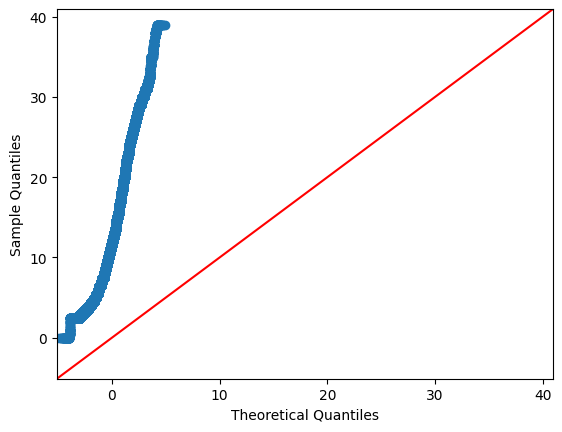

In [ ]:
# Creating a Q-Q plot with 45 degree line added to plot
fig = sm.qqplot(taxi_data['fare_amount'], line = '45')
plt.show()

#### <font color='papayawhip'>**INTERPRETATION OF Q-Q PLOT**</font>
- <p align='justify'>The data values clearly do not follow the red coloured 45-degree line, which is an indication that they do not follow a normal distribution.</p>
- <p align='justify'>We cannot apply ANOVA and Chi-square test on this data. Remaining are z-test and t-test. A z-distribution will not be a good idea because the data is not normally distributed and also, the standard deviation of the population is unknown. Hence, T test will be used.</p>
- <p align='justify'>Given that the T-test can be applied to both small and large samples and does not require the population standard deviation, it is a more universally applicable approach for hypothesis testing in many practical research scenarios, including analyses of taxi trip data.</p>
- <p align='justify'>In the analysis of NYC Yellow Taxi Trip Records, it is likely to deal with an unknown population standard deviation and potentially large dataset. The T-test offers here a more appropriate and flexible method for comparing means between two groups (e.g., fare amounts and payment type). It provides a reliable way to infer about the population, accommodating the uncertainty that comes with estimating population parameters from sample data.</p>

### <font color='sandybrown'>**FORMULATING THE HYPOTHESES**</font>
#### <font color='papayawhip'>**NULL HYPOTHESIS:**</font> There is no difference in average fare between customers using credit cards and customers using cash.
#### <font color='papayawhip'>**ALTERNATE HYPOTHESIS:**</font> There is a difference in the average fare between customers using credit cards vs cash.

In [ ]:
# sample 1
credit_card = taxi_data[taxi_data['payment_type'] =='Card']['fare_amount']

# sample 2
cash = taxi_data[taxi_data['payment_type']=='Cash']['fare_amount']

# Performing t test on both the samples
t_stats, p_value = stats.ttest_ind(a = credit_card, b = cash, equal_var = False)
print('T statistics',t_stats,'P-value',p_value)

# Comparing the p value with the signifacne of 5% (or 0.05)
if p_value < 0.05:
  print('\nReject the null hypothesis')
else:
  print('\nFail to reject the null hypothesis')

T statistics 169.2111527245052 P-value 0.0

Reject the null hypothesis


### <font color='papayawhip'>**INTERPRETATION OF T-TEST RESULTS**</font>
- <p align='justify'>Since the p-value is significantly smaller than the significance level of 5%, the null hypothesis is therefore, rejected.</p>
- <p align='justify'>Hence, it can be concluded that there is a significant difference statistically in the average fare amount between customers who use credit cards and customers who use cash.</p>

### <font color='sandybrown'>**KEY BUSINESS INSIGHTS**</FONT>
- **Impact of Payment Type on Revenue:**
1. *Insight:* The analysis reveals a clear difference in fare amounts between credit card and cash payments. Credit card payments are associated with higher average fares compared to cash.
2. *Business Implication:* Card payments could be encouraged more by offering promotions, attractive deals, discounts, or loyalty points, as it is more likely to generate higher revenue per trip.

- **Trip Duration as a Strong Predictor of Fare:**
1. *Insight:* There is a strong positive correlation between trip duration and fare amount. Longer trips result in significantly higher fares.
2. *Business Implication:* Understanding this relationship can help optimize routes and time management for drivers. Drivers can focus on areas or times of the day that yield longer trips, such as airport routes or during peak hours.

- **Passenger Count Influence on Payment Preferences:**
1. *Insight:* Trips with higher passenger counts show a preference for card payments. Conversely, single-passenger trips have a higher tendency for cash payments.
2. *Business Implication:* This insight can be used to personalize payment method suggestions during bookings. For example, when groups book rides, card payments could be automatically suggested to increase revenue.

- **Outliers and High-Value Trips:**
1. *Insight:* Outliers in the dataset indicate some rare but high-value trips with extremely high fare amounts. These are often intercity or long-distance trips.
2. *Business Implication:* Taxi companies can offer premium services for these long-distance routes, or create partnerships with hotels and airports to capture these high-value trips more consistently.

- **Revenue Optimization Strategies:**
1. *Insight:* By focusing on encouraging payment methods (like cards) and analyzing peak hours and high-fare zones, taxi drivers can increase their earnings without increasing the number of trips.
2. *Business Implication:* Business owners can use data-driven strategies to optimize dispatching and driver scheduling to focus on these high-revenue opportunities.

- **Customer Segmentation:**
1. *Insight:* The data shows patterns in fare amounts and payment types that can be used to segment customers. For example, frequent long-distance travelers may prefer card payments, whereas local commuters may prefer cash.
2. *Business Implication:* This segmentation allows for targeted marketing campaigns, offering personalized discounts or services based on payment method or trip type.

